In [78]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt


In [56]:
engine = create_engine("sqlite:///hawaii.sqlite")

# get tables
inspector_morse = inspect(engine)
tables = inspector_morse.get_table_names()
for table in tables:
    print(table)
    
    columns = inspector_morse.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [58]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [59]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_temps[0:5] 

In [60]:
#  3. Convert the June temperatures to a list.
# tobs is 'temperature observations' jtobs for june, dtobs for december
jtobs = [x.tobs for x in june_temps]
jtobs[0:5] 

[78.0, 76.0, 78.0, 76.0, 77.0]

In [61]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
# Make a connection to the SQL database
conn = engine.connect()

june_df = pd.DataFrame()
june_df["June Temps"] = jtobs
june_df.head() 


,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [84]:
query = """
        SELECT
            *
        from
            measurement m
        join station s on m.station = s.station
        WHERE
            date like '%-06-%';
        """

# Have a look at it all
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,134,USC00519397,2010-06-01,0.00,78.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,135,USC00519397,2010-06-02,0.01,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,136,USC00519397,2010-06-03,0.00,78.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,137,USC00519397,2010-06-04,0.00,76.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,138,USC00519397,2010-06-05,0.00,77.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [63]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe() 

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [64]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
december_temps[0:5] 

In [65]:
# 7. Convert the December temperatures to a list.
dtobs = [x.tobs for x in december_temps]
dtobs[0:5] 

[76.0, 74.0, 74.0, 64.0, 64.0]

In [66]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame()
december_df["December Temps"] = dtobs
december_df[0:10] 

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
5,67.0
6,77.0
7,66.0
8,69.0
9,68.0


In [67]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


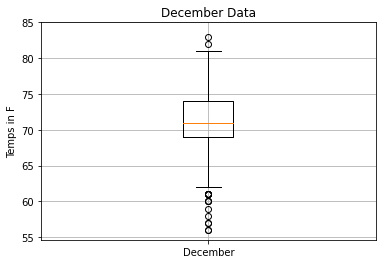

Summary Statistics


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [68]:
x_labels = ["December"]
fig, ax = plt.subplots()
ax.boxplot(dtobs, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('December Data')
ax.set_ylabel('Temps in F')
ax.set_yticks(np.arange(55, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
december_df.describe()


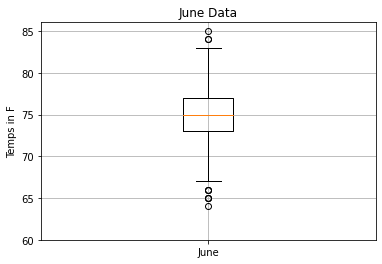

Summary Statistics


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [69]:
x_labels = ["June"]
fig, ax = plt.subplots()
ax.boxplot(jtobs, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('June Data')
ax.set_ylabel('Temps in F')
ax.set_yticks(np.arange(60, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
june_df.describe()


In [87]:
query = """
        SELECT
            *
        from
            measurement m
        join station s on m.station = s.station
        WHERE
            date like '%-12-%';
        """

# Have a look at it all
df = pd.read_sql(query, conn)
#df.head()

df[300:310]

,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
300,3796,USC00513117,2012-12-29,0.00,65.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
301,3797,USC00513117,2012-12-30,0.21,68.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
302,3798,USC00513117,2012-12-31,0.17,67.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
303,4130,USC00513117,2013-12-01,0.00,76.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
304,4131,USC00513117,2013-12-02,0.93,70.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
305,4132,USC00513117,2013-12-03,0.80,71.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
306,4133,USC00513117,2013-12-04,0.00,69.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
307,4134,USC00513117,2013-12-05,0.00,67.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
308,4135,USC00513117,2013-12-06,0.00,69.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
309,4136,USC00513117,2013-12-07,0.00,71.0,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6


In [88]:
june_rain = session.query(Measurement).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_rain[0:5] 



In [89]:
jrcp = [x.prcp for x in june_rain]
jrcp[0:5] 

[0.0, 0.01, 0.0, 0.0, 0.0]

In [92]:
june_rain_df = pd.DataFrame()
june_rain_df["June Precipitation"] = jrcp
june_rain_df[0:10] 

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,0.00
8,0.00
9,0.00


In [93]:
june_rain_df.describe()


,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [94]:
december_rain = session.query(Measurement).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
december_rain[0:5] 


In [95]:
drcp = [x.prcp for x in december_rain]
drcp[0:5] 

[0.04, 0.0, 0.0, 0.0, 0.0]

In [96]:
december_rain_df = pd.DataFrame()
december_rain_df["December Precipitation"] = drcp
december_rain_df[0:10] 

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,1.58
8,0.77
9,0.00


In [97]:
december_rain_df.describe()


,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
